In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from ydata_profiling import ProfileReport
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
%matplotlib inline

In [344]:
df=pd.read_csv('medical_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [345]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [346]:
df.value_counts()

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
47   male    29.830  3         no      northwest  9620.33070     1
48   female  25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.740  0         no      southeast  3756.62160     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Name: count, Length: 1337, dtype: int64

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [348]:
v=['age','bmi','children','charges']

In [349]:
for i in v:
    print(i,skew(df[[i]]))

age [0.05561008]
bmi [0.28372857]
children [0.93732812]
charges [1.51417971]


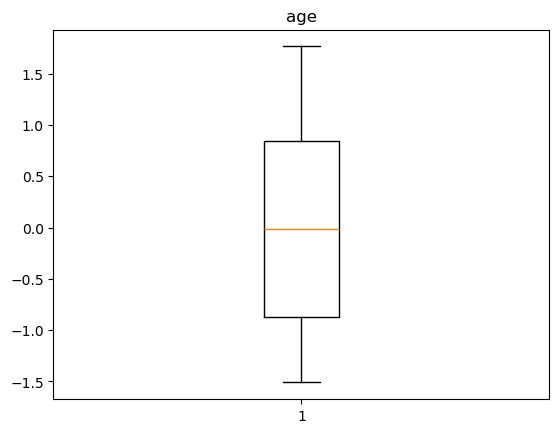

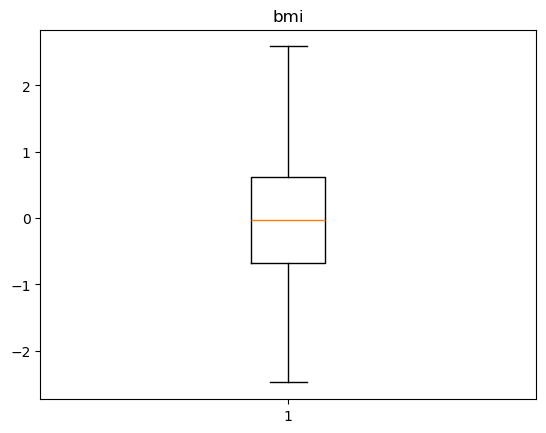

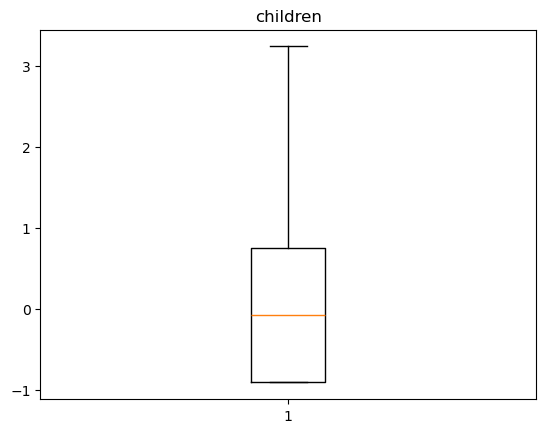

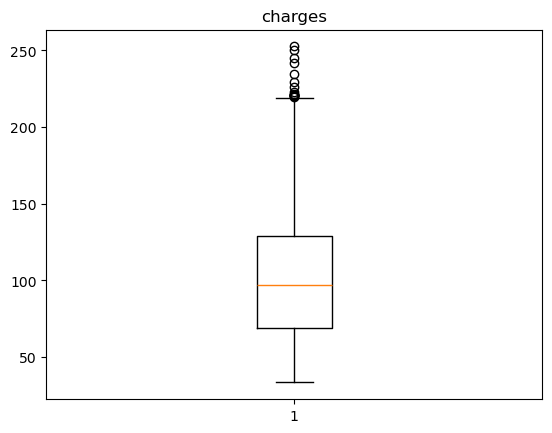

In [389]:
for i in v:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [351]:
a=['sex','smoker']

In [352]:
e=['region']

In [353]:
h=['bmi']

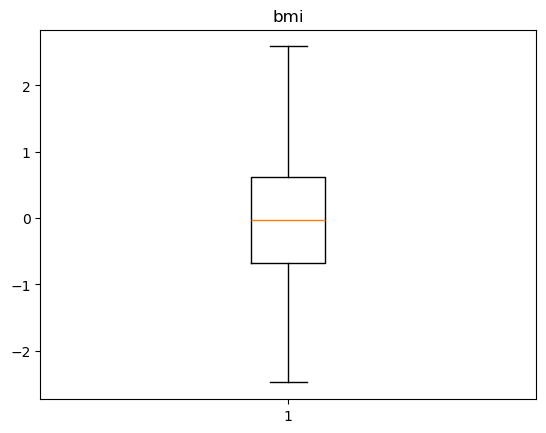

In [388]:
for i in h:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    df.loc[df[i]<lower,i]=lower

In [355]:
b=OneHotEncoder()

In [356]:
c=LabelEncoder()

In [357]:
for i in a:
    df[i]=c.fit_transform(df[i])

In [358]:
df=pd.get_dummies(df,columns=['region']).astype(int)

In [390]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.518122,-0.908614,1,129.938447,0,0,0,1
1,-1.509965,1,0.462657,-0.078767,0,41.533119,0,0,1,0
2,-0.797954,1,0.462657,1.580926,0,66.700825,0,0,1,0
3,-0.441948,1,-1.335438,-0.908614,0,148.270024,0,1,0,0
4,-0.513149,1,-0.354659,-0.908614,0,62.177166,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,-0.027733,1.580926,0,102.956301,0,1,0,0
1334,-1.509965,0,0.135731,-0.908614,0,46.957428,1,0,0,0
1335,-1.509965,0,0.953046,-0.908614,0,40.360872,0,0,1,0
1336,-1.296362,0,-0.845048,-0.908614,0,44.799554,0,0,0,1


In [360]:
z=StandardScaler()

In [361]:
df['age']=z.fit_transform(df[['age']])
df['bmi']=z.fit_transform(df[['bmi']])

In [362]:
df['children']=z.fit_transform(df[['children']])

In [391]:
df['charges']=np.sqrt(df['charges'])

In [392]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.518122,-0.908614,1,11.399055,0,0,0,1
1,-1.509965,1,0.462657,-0.078767,0,6.444619,0,0,1,0
2,-0.797954,1,0.462657,1.580926,0,8.167057,0,0,1,0
3,-0.441948,1,-1.335438,-0.908614,0,12.176618,0,1,0,0
4,-0.513149,1,-0.354659,-0.908614,0,7.885250,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,-0.027733,1.580926,0,10.146738,0,1,0,0
1334,-1.509965,0,0.135731,-0.908614,0,6.852549,1,0,0,0
1335,-1.509965,0,0.953046,-0.908614,0,6.353021,0,0,1,0
1336,-1.296362,0,-0.845048,-0.908614,0,6.693247,0,0,0,1


In [393]:
x=df.drop('charges',axis=1)
y=df['charges']

In [394]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=3)

In [395]:
x_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
67,0.056461,1,-0.681585,-0.078767,0,0,1,0,0
145,-0.726752,0,1.279972,1.580926,0,0,0,1,0
897,-1.438764,1,-0.845048,-0.078767,0,0,1,0,0
415,0.270064,0,0.789583,-0.078767,0,0,0,1,0
720,0.839674,0,1.606899,-0.908614,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
789,1.622887,0,-0.191196,-0.908614,0,0,0,1,0
256,1.195680,1,0.462657,-0.908614,1,0,1,0,0
968,-1.296362,1,-0.845048,0.751079,0,1,0,0,0
952,-0.655551,0,-0.354659,-0.078767,0,0,1,0,0


In [396]:
y_train

67       8.940426
145      8.466395
897      6.864946
415      9.257590
720      9.968602
          ...    
789     10.770530
256     14.476649
968      7.567202
952      8.202621
1273     8.300511
Name: charges, Length: 802, dtype: float64

In [397]:
model=LinearRegression()

In [398]:
model.fit(x_train,y_train)

LinearRegression()

In [399]:
y_pred=model.predict(x_test)
y_pred

array([ 8.746215  ,  9.43187616,  7.25554449, 10.34009078,  7.52268038,
       10.60204836,  9.24731731,  6.99623971,  9.76631123,  7.54699298,
       10.01905747, 10.47405724,  7.16528433, 10.0646456 ,  9.19454003,
       10.41292421,  9.45701098,  7.33274135,  7.29847982, 10.1850841 ,
       10.26999369,  8.8635744 ,  9.17031575,  8.75916011, 10.64593336,
       10.33000961,  8.53002405,  8.88663786,  8.70968482,  7.51821178,
        7.07941366, 10.79964852,  7.97582169,  7.54408815,  7.31615288,
       14.37023532,  8.85319122,  8.94155827,  7.7783418 ,  8.03183692,
        8.0570992 , 11.31500124,  7.17170808, 12.12600072, 13.65603595,
        9.36343222,  9.69733533,  8.86999815,  7.60117762, 12.9149036 ,
        9.54932769, 13.27294781,  7.27282037,  9.83652451, 14.38843302,
       10.07447579, 12.78944048,  7.53831917,  9.29241333, 10.57002766,
        7.92511575,  8.87060189, 10.67495532, 10.57198282,  8.83087769,
        9.10824433, 12.97014484,  8.58505717, 14.21483147, 10.86

In [400]:
residual=y_pred-y_test
residual

353    -1.807137
339    -0.093373
65      0.794178
685     0.042629
781     1.704380
          ...   
753    -0.513713
179     0.467496
1275   -0.411634
10      0.523212
354    -3.371191
Name: charges, Length: 536, dtype: float64

<Axes: xlabel='charges', ylabel='Density'>

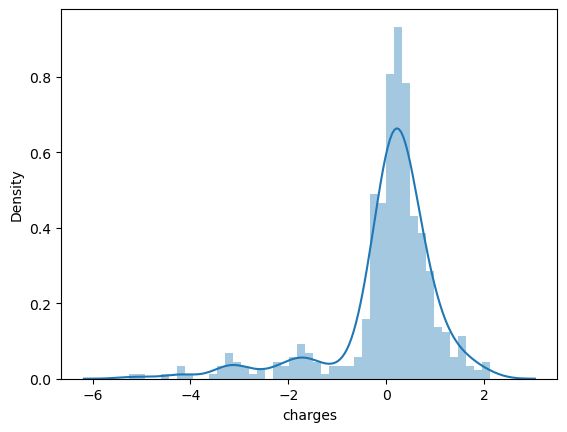

In [401]:
sns.distplot(residual)

<Axes: >

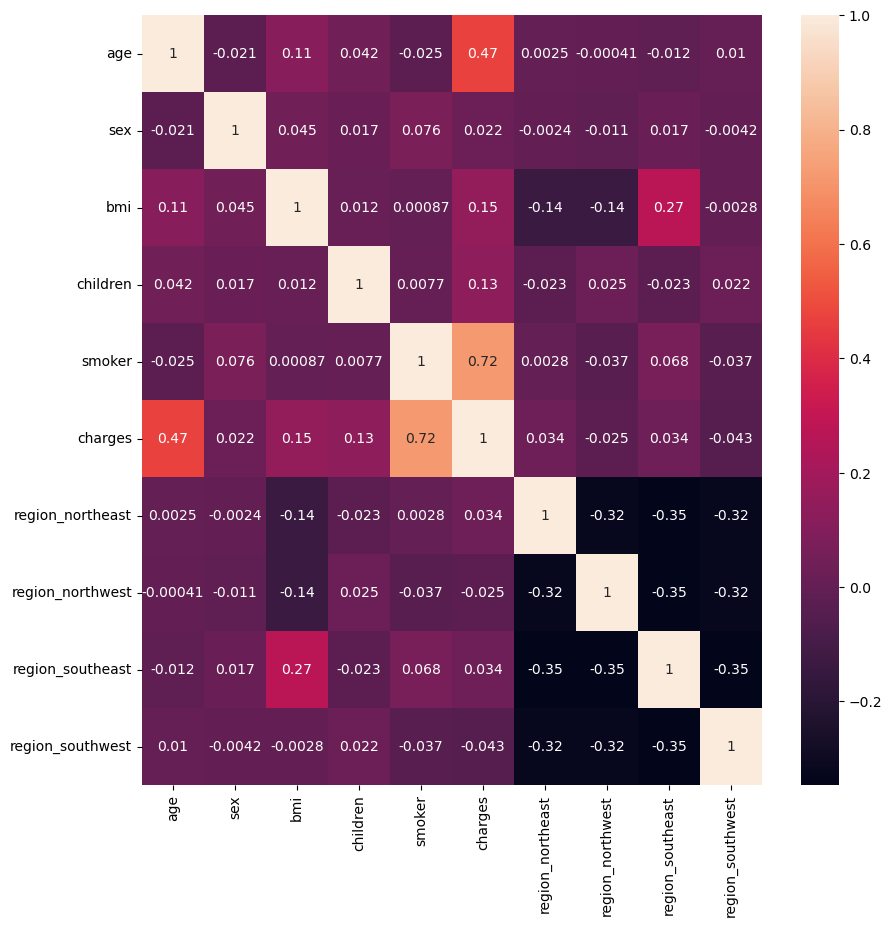

In [402]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [403]:
#training data
y_pred_train=model.predict(x_train)
mse_train=mean_squared_error(y_train,y_pred_train)
mae_train=mean_absolute_error(y_train,y_pred_train)
train=r2_score(y_train,y_pred_train)
print('mse_train',mse_train)
print('mae_train',mae_train)
print('train r2 score',train)

mse_train 1.1422263237653008
mae_train 0.6867919510647191
train r2 score 0.7810689340699819


In [404]:
#testing data
y_pred_test=model.predict(x_test)
mse_test=mean_squared_error(y_test,y_pred_test)
mae_test=mean_absolute_error(y_test,y_pred_test)
test=r2_score(y_test,y_pred_test)
print('mse_test',mse_test)
print('mae_test',mae_test)
print('test r2 score',test)

mse_test 1.1429821583814002
mae_test 0.680954456614258
test r2 score 0.7777682974989962


In [411]:
model.score(x_train,y_train)

0.7810689340699819

In [412]:
model.score(x_test,y_test)

0.7777682974989962

In [379]:
l2=Ridge(5.0)

In [380]:
l2.fit(x_train,y_train)

Ridge(alpha=5.0)

In [381]:
l2.score(x_train,y_train)

0.7779440056731259

In [382]:
l2.score(x_test,y_test)

0.7795962569753419

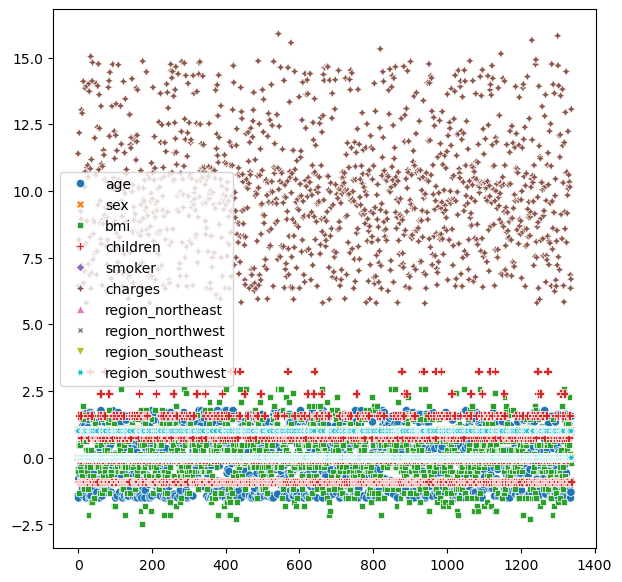

In [405]:
plt.figure(figsize=(7,7))
sns.scatterplot(df)
plt.show()

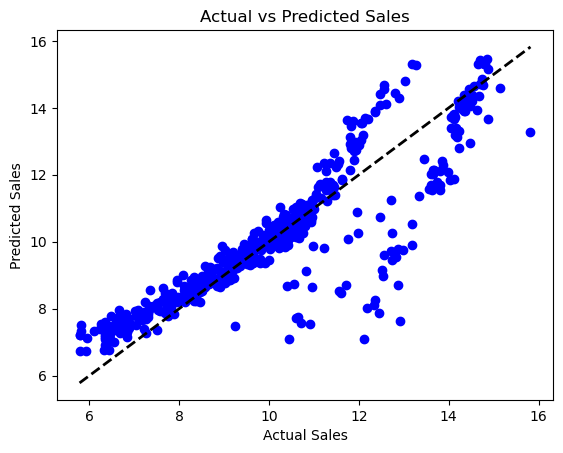

In [417]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--',lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()